In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [11]:
numerator = 1

start = 0.02
end = 1.02
step = 0.02
X = torch.arange(start, end, step)
y = numerator / X

In [12]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

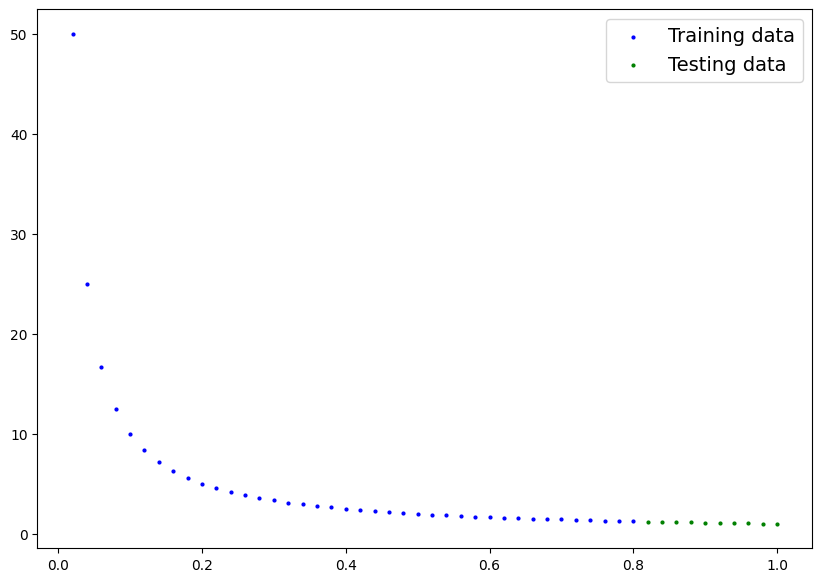

In [13]:
def plot_predictions(train_data = X_train, 
                     train_labels = y_train, 
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    # Plots training data, test data, and compares predictions
    plt.figure(figsize=(10,7))
        
    # Plots training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")
    
    #are there predictions?
    if predictions is not None:
        # Plot the preductions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    # Show the legend
    plt.legend(prop={"size": 14})

plot_predictions()

In [14]:
from torch import nn

class InverseFunctionRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.numerator = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.numerator / x

In [33]:
#torch.manual_seed(42)
model_0 = InverseFunctionRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([-1.1229], requires_grad=True)]

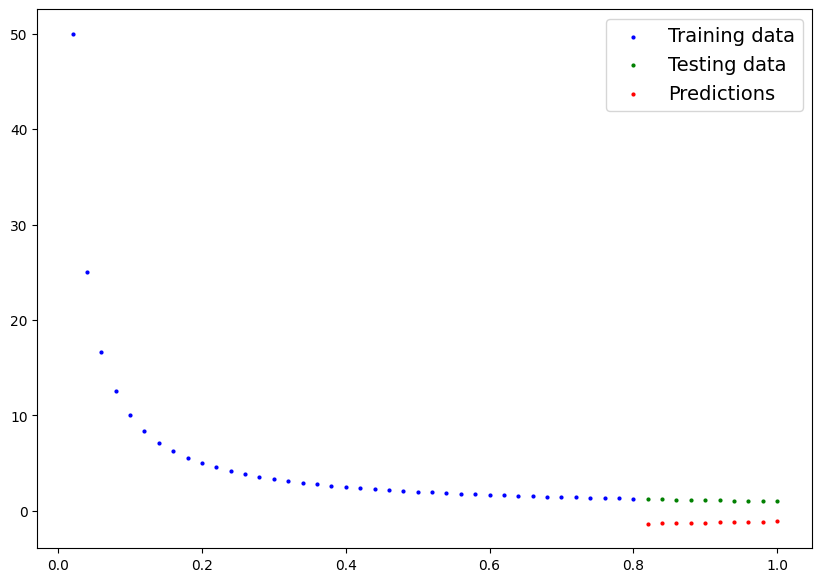

In [34]:
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions = y_preds)

In [35]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [36]:
epochs = 400
epoch_count = []
loss_values = []
test_loss_values = []
# Training
for epoch in range(0, epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    # Display info
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | loss: {loss} | test loss: {test_loss}")

Epoch: 0 | loss: 11.353416442871094 | test loss: 2.2831645011901855
Epoch: 10 | loss: 8.493114471435547 | test loss: 1.693094253540039
Epoch: 20 | loss: 5.632813453674316 | test loss: 1.103023648262024
Epoch: 30 | loss: 2.7725117206573486 | test loss: 0.5129529237747192
Epoch: 40 | loss: 0.0877884104847908 | test loss: 0.04089658334851265
Epoch: 50 | loss: 0.0877884104847908 | test loss: 0.04089658334851265
Epoch: 60 | loss: 0.0877884104847908 | test loss: 0.04089658334851265
Epoch: 70 | loss: 0.0877884104847908 | test loss: 0.04089658334851265
Epoch: 80 | loss: 0.0877884104847908 | test loss: 0.04089658334851265
Epoch: 90 | loss: 0.0877884104847908 | test loss: 0.04089658334851265
Epoch: 100 | loss: 0.0877884104847908 | test loss: 0.04089658334851265
Epoch: 110 | loss: 0.0877884104847908 | test loss: 0.04089658334851265
Epoch: 120 | loss: 0.0877884104847908 | test loss: 0.04089658334851265
Epoch: 130 | loss: 0.0877884104847908 | test loss: 0.04089658334851265
Epoch: 140 | loss: 0.0877

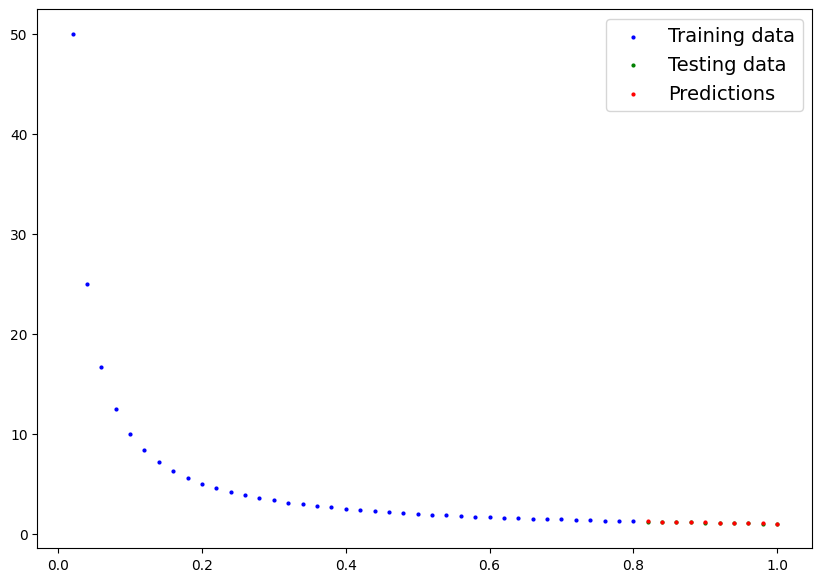

In [37]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions = y_preds_new)

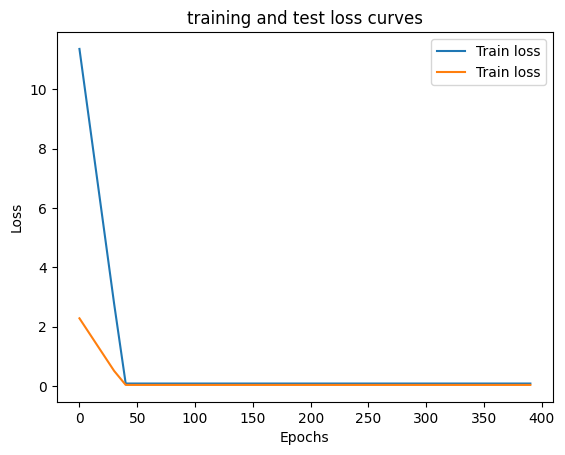

In [38]:
# Plot the loss curves
plt.plot(epoch_count, loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Train loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [39]:
model_0.state_dict()

OrderedDict([('numerator', tensor([1.0164]))])